In [2]:
# Import modules
import pandas as pd
import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
filename = 'data/car_prices/EV_car_prices.csv'
sns.set_context('notebook', 
                font_scale=1.5) 
                #rc={"lines.linewidth": 3}
color_graph = '#8A9A5B'
color_background = '#E5E4E2'

Baseline_year = 2010


<a id=Function_DisplayTrend></a> <br>
### Display Trend Function

In [44]:
def DisplayTrend(df, col, color_custom):
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # Convert DataFrame index and column to NumPy arrays
    x_values = df.index.values
    y_values = df[col].values
    
    # Create the line plot
    ax.plot(x_values, y_values, marker='o', linestyle='-', color=color_custom, linewidth=5)
    
    # Set title and labels
    title_obj = plt.title("{0}".format(col), size=20)
    plt.setp(title_obj, color=color_custom)  
    ax.set_xlabel("Years")
    ax.set_ylabel("{0}".format(col))
    
    plt.grid(True)
    plt.show()

In [45]:
def PlotGrowth(df, col, Baseline_year, color_custom):

    fig, ax = plt.subplots(figsize=(15, 10))

    # Formula and Calculation of Percentage Change
    Baseline = df.loc[Baseline_year][col]

    # values
    x_values = df.index.values
    y_values = 100 * (df[col].values - Baseline)/Baseline
  
    #Plot
    ax = sns.barplot( x = x_values,
                      y = y_values,
                     color = color_custom       
                    )
    
    #show mumerical values
    for i in ax.containers:
        ax.bar_label(i,fmt="%.2f%%")

    #Title
    title_obj = plt.title("Percentage change {0}, baseline {1}".format(col, Baseline_year), size=20)
    plt.setp(title_obj, color=color_custom)         
    
    plt.show()

<a id=Function_PlotCorrelation></a> <br>
### Plot Correlation Function


In [46]:
def plotCorrelation(df, X_variable, Y_variable, color_custom, log_x):

    _ = sns.lmplot(data= df, 
                   x= X_variable, 
                   y= Y_variable, 
                   logx=log_x,
                   scatter_kws={'color':  color_custom},
                   line_kws={'color':  color_custom},
                   #palette = color_custom,
                   height=10)
    
    #Title
    title_obj = plt.title('{0} vs {1}'.format(X_variable, Y_variable), size=20)
    plt.setp(title_obj, color=color_custom)  
    plt.show()


In [47]:
df = pd.read_csv(filename)

In [48]:
# Deleting all columns with nan values
df.dropna(axis=1,how='all',inplace=True)

for col in df.columns:
    df[col] = df[col].apply(lambda x: int(x))
    
df.set_index('Year', inplace = True)


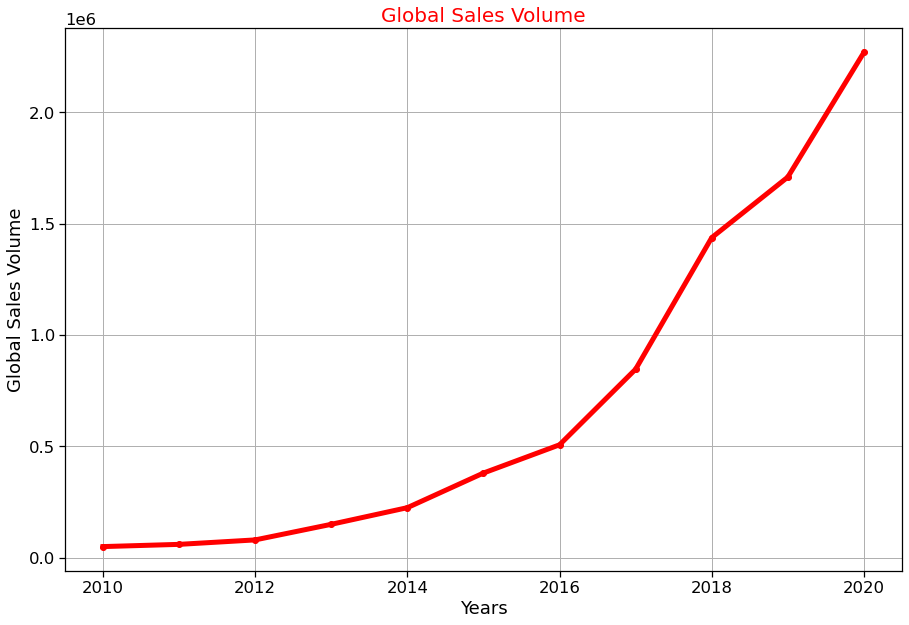

In [56]:
column = 'Global Sales Volume'
DisplayTrend(df, column , red_color)

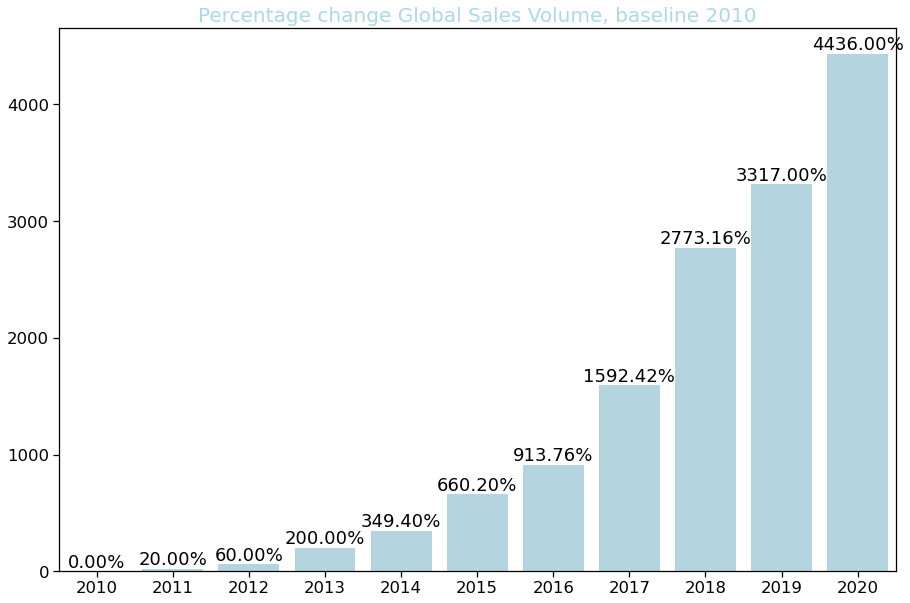

In [24]:
light_blue_color = "#ADD8E6"
PlotGrowth(df, column , Baseline_year, light_blue_color)

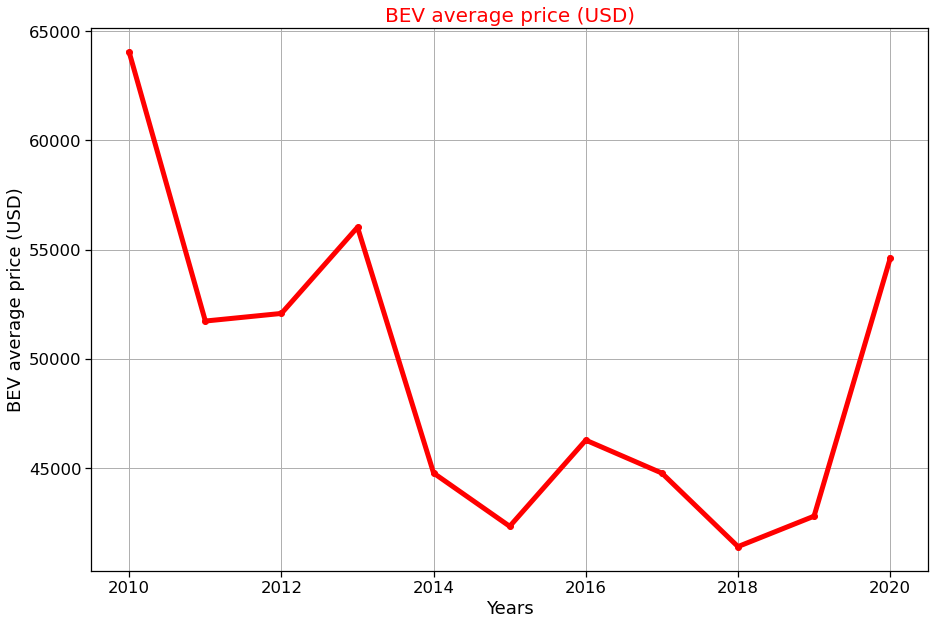

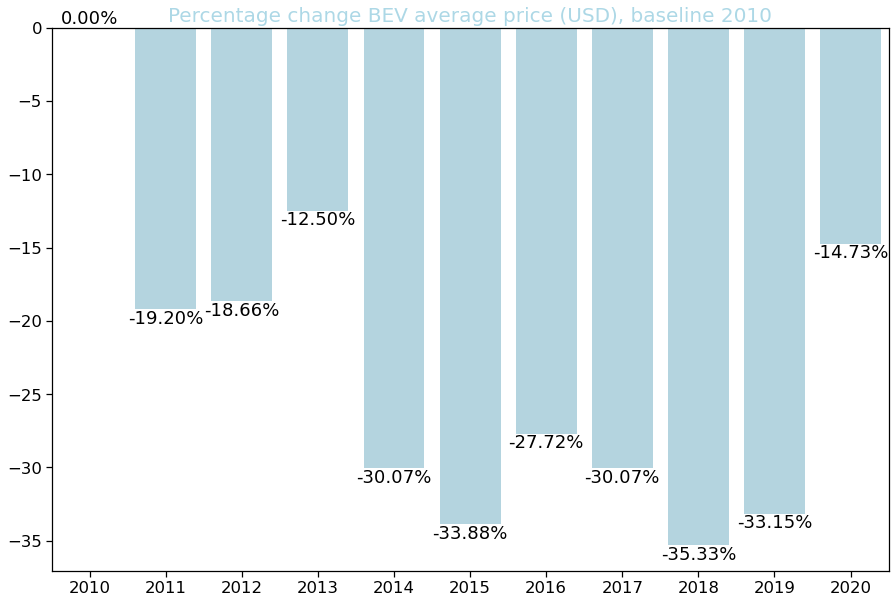

In [26]:
column =  'BEV average price (USD)'
red_color = "#FF0000"
DisplayTrend(df, column , red_color)
PlotGrowth(df, column , Baseline_year, light_blue_color)

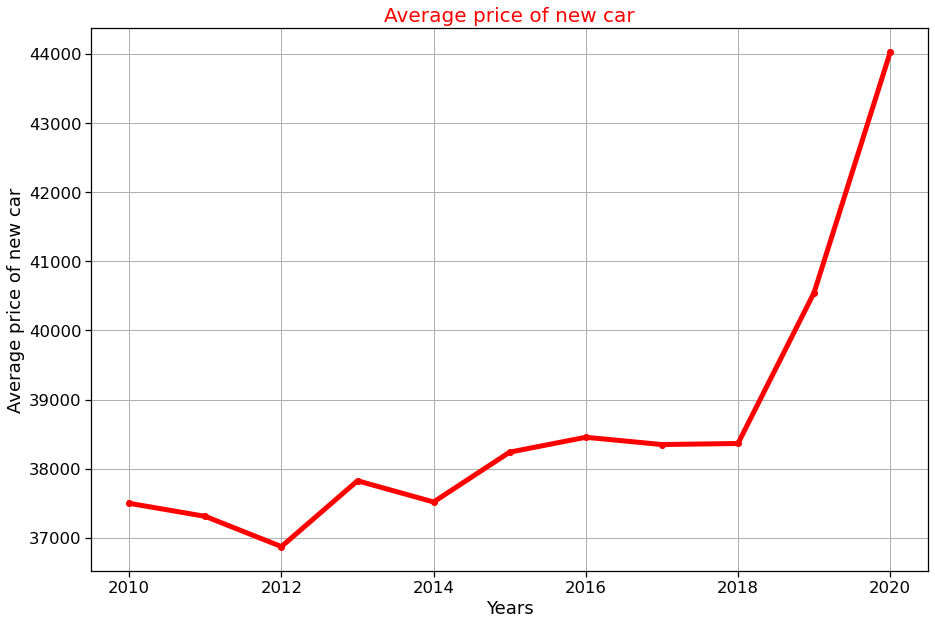

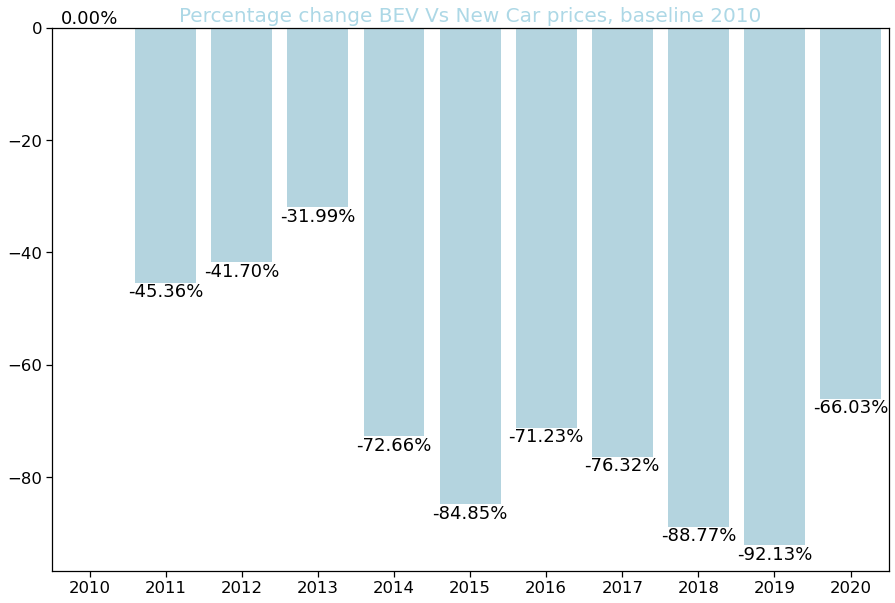

In [50]:
df['BEV Vs New Car prices'] = 100 * (df['BEV average price (USD)'] - df['Average price of new car'])/df['Average price of new car']
DisplayTrend(df, 'Average price of new car' , red_color)
PlotGrowth(df, 'BEV Vs New Car prices' , Baseline_year, light_blue_color)

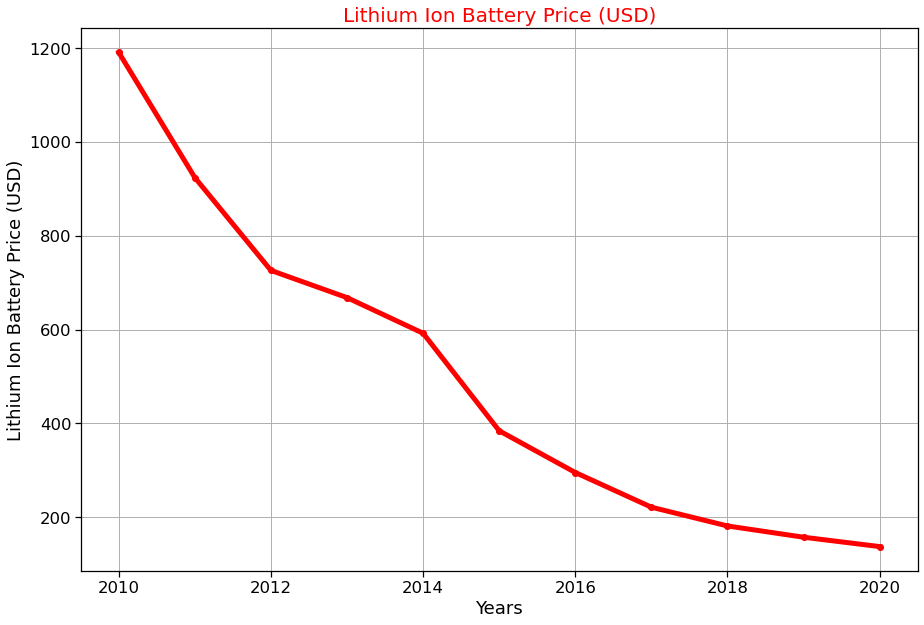

In [34]:
column = 'Lithium Ion Battery Price (USD)'
DisplayTrend(df, column , red_color)


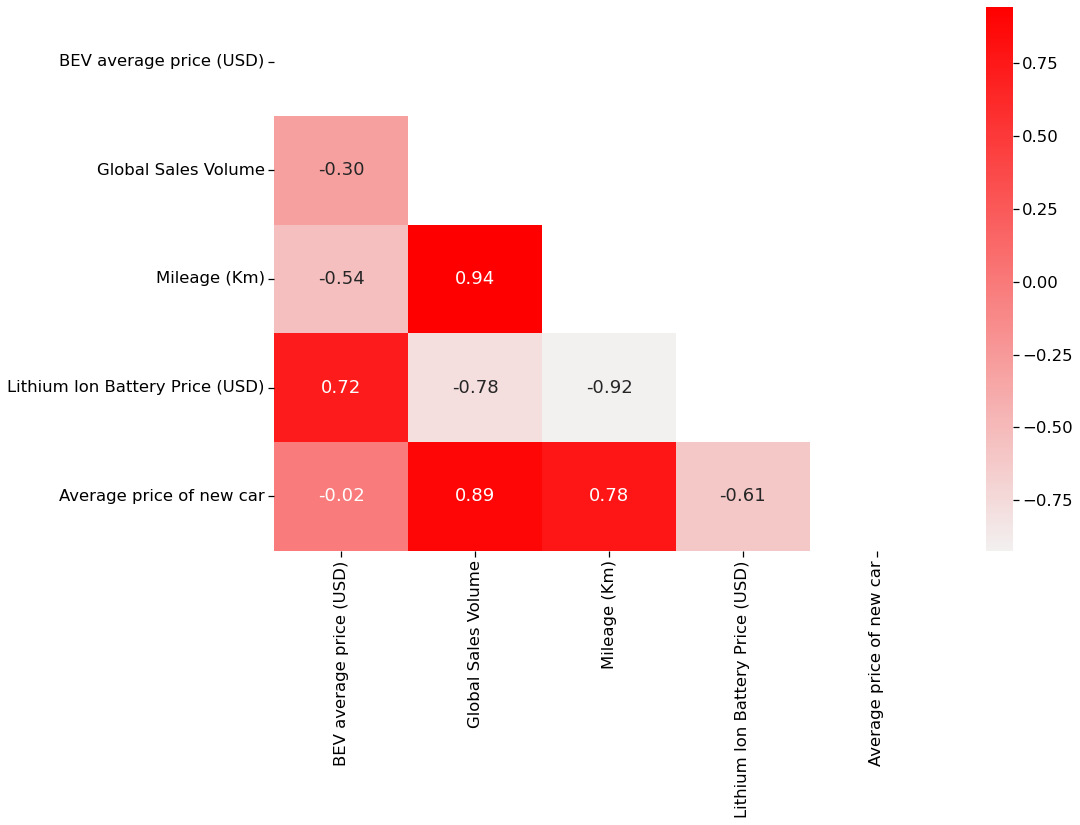

In [40]:

fig, ax = plt.subplots(figsize=(15, 10))
# creating mask
mask = np.triu(np.ones_like(df.corr()))
# plotting a triangle correlation heatmap
_ = sns.heatmap(df.corr(), 
                cmap=sns.light_palette(red_color , as_cmap=True), 
                annot=True, 
                mask=mask,
                fmt=".2f")
 
# displaying heatmap
plt.show()

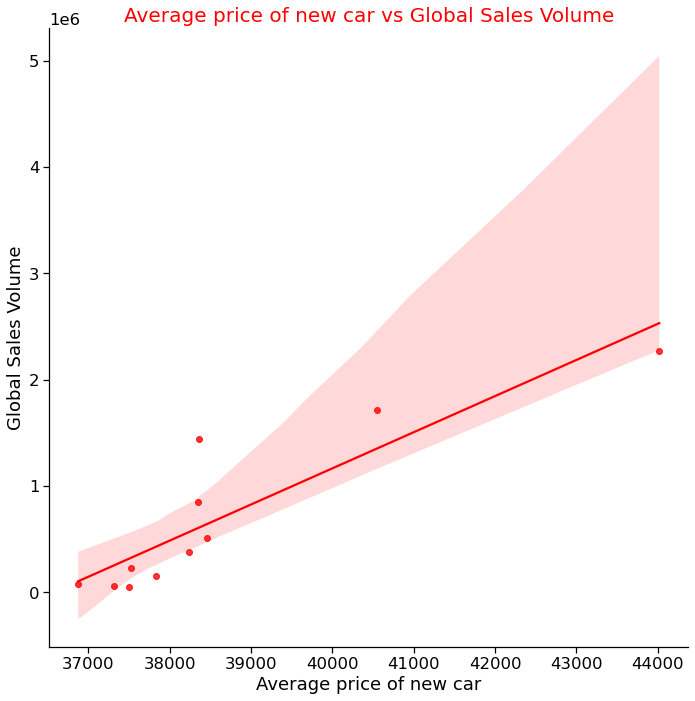

In [51]:
light_red_color = "#FFCCCB"
plotCorrelation(df,  'Average price of new car', 'Global Sales Volume', red_color, False)

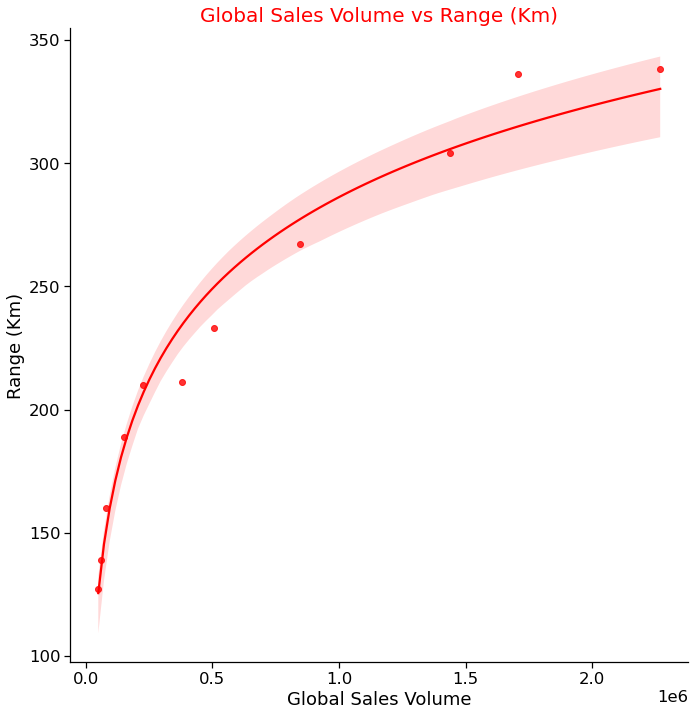

In [53]:
plotCorrelation(df, 'Global Sales Volume',  'Range (Km)', red_color, True)

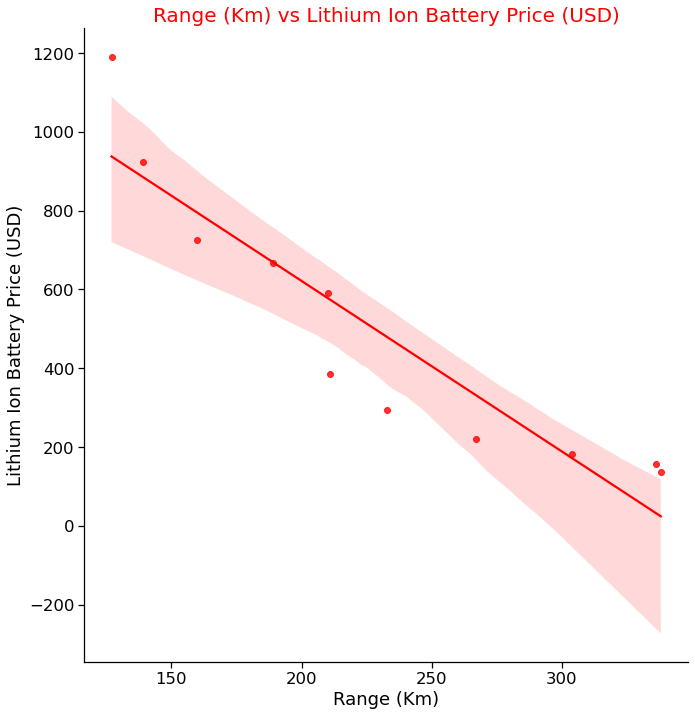

In [54]:
plotCorrelation(df,  'Range (Km)', 'Lithium Ion Battery Price (USD)', red_color,  False)

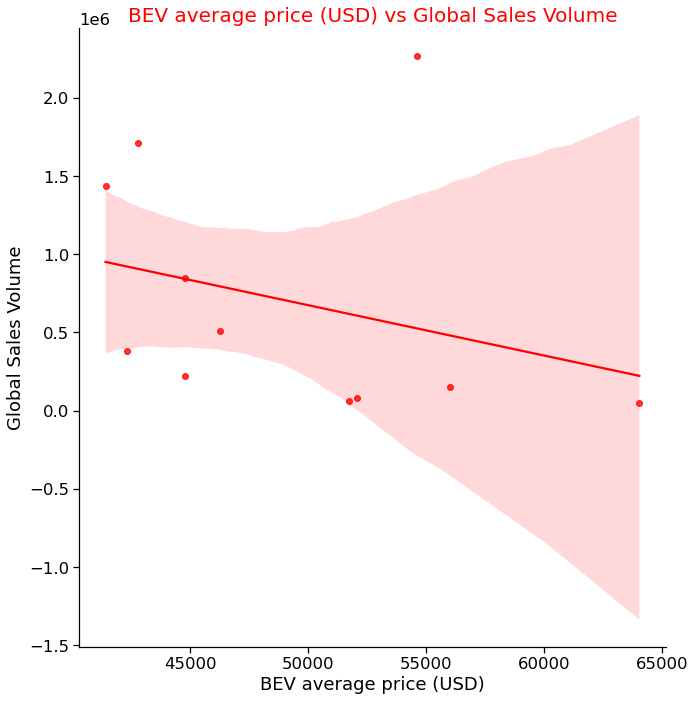

In [55]:
plotCorrelation(df,'BEV average price (USD)', 'Global Sales Volume', red_color,  False)